In [ ]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
import matplotlib.pyplot as plt

search_result = search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpfs = search_result.download_all(quality_bitmask='default')
last_pixelfile = tpfs[0]

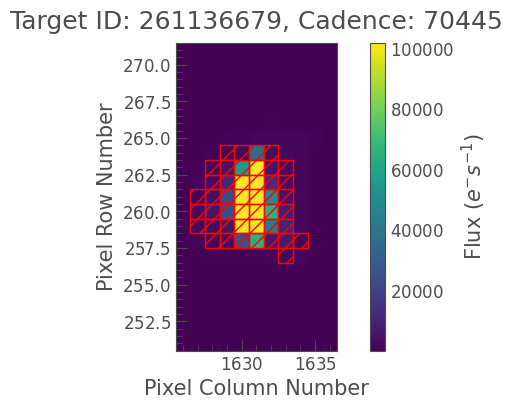

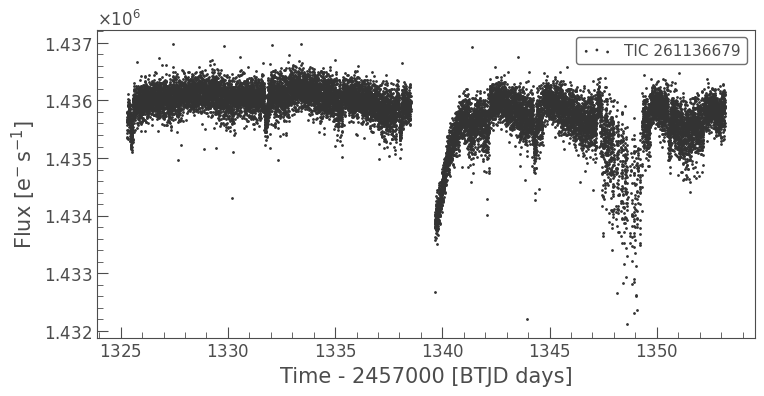

In [26]:
last_pixelfile.plot(aperture_mask=last_pixelfile.pipeline_mask)
lc = last_pixelfile.to_lightcurve()
lc.scatter()
plt.show()

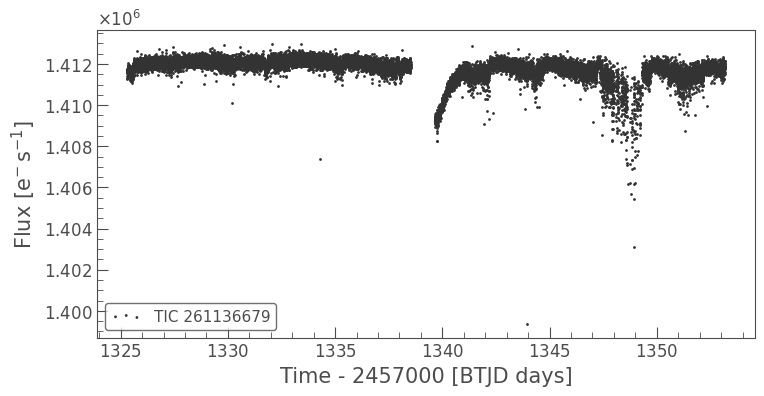

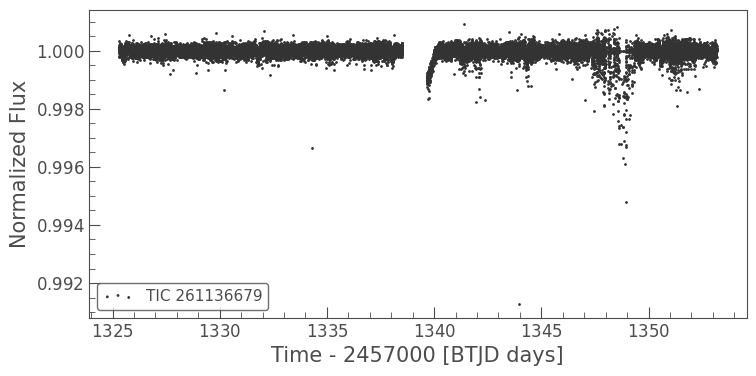

In [27]:
aperture_mask = last_pixelfile.create_threshold_mask(threshold=10)
lc = last_pixelfile.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()
plt.show()

flat_lc = lc.flatten(window_length=1001)
flat_lc.scatter()
plt.show()

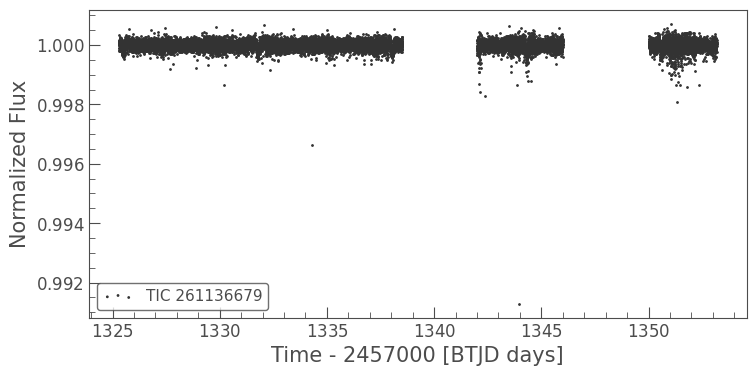

In [28]:
jd_time = flat_lc.time.jd
mask = ((jd_time < (2457000+1339)) | (jd_time > (2457000+1342)))&((jd_time < (2457000+1346)) | (jd_time > (2457000+1350)))
masked_lc = flat_lc[mask]

masked_lc.scatter()
plt.show()

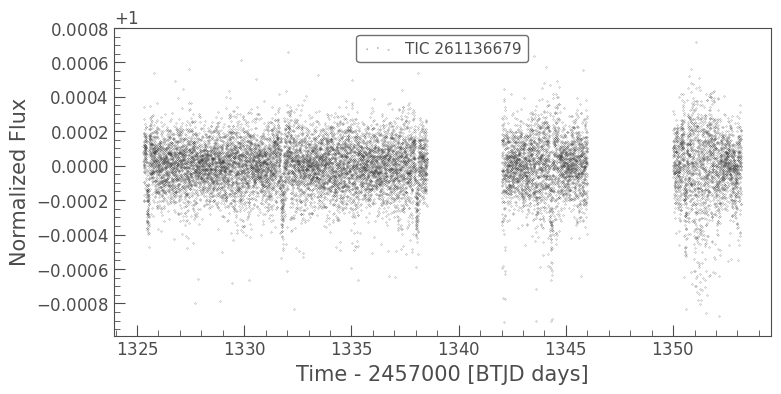

In [29]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)
plt.show()

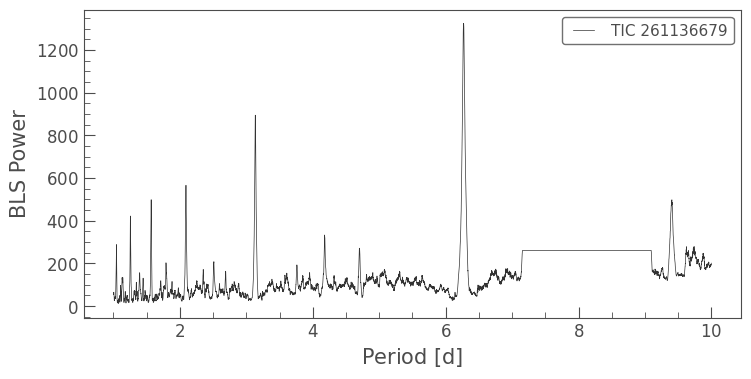

In [30]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

Best fit period: 6.26800 d


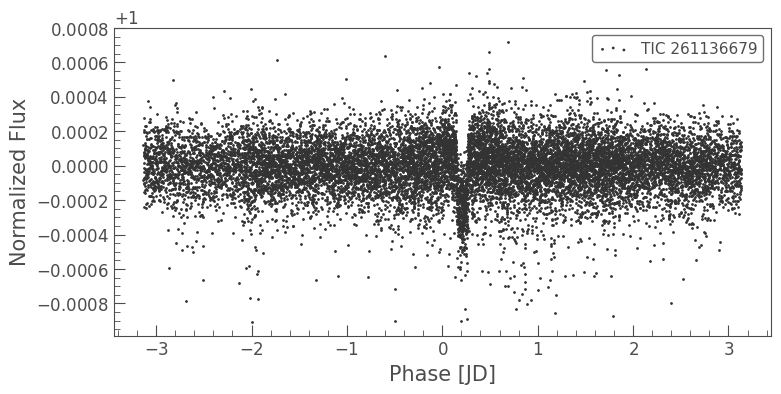

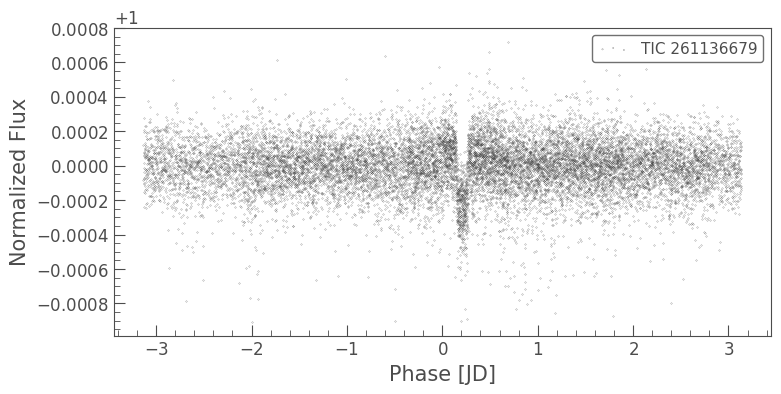

In [37]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

clipped_lc.fold(periodogram.period_at_max_power).scatter()
plt.show()

folded_lc = clipped_lc.fold(periodogram.period_at_max_power)
folded_lc.scatter(s=0.1)
plt.show()

C:\Users\Preston\AppData\Local\Temp\ipykernel_20044\1797598433.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=5)


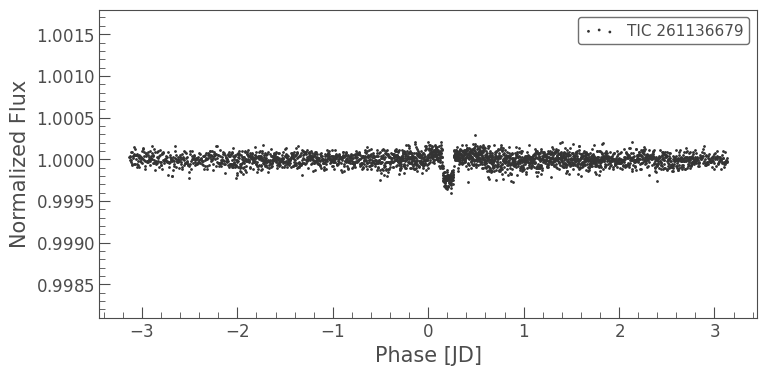

In [46]:
binned_lc = folded_lc.bin(binsize=5)
binned_lc.scatter()
plt.ylim([min(binned_lc.flux) - 0.0015, max(binned_lc.flux) + 0.0015])
plt.show()